In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.stats import norm

In [3]:
cwd = os.getcwd()

In [5]:
df = pd.read_csv(f"{cwd}/7-29_acc_df.csv")

In [11]:
umap_pca_algs = ['pca','umap', '$\\alpha = $0.25','$\\alpha = $0.5','$\\alpha = $0.75']
up_df = df[df['algorithm'].isin(umap_pca_algs)]


In [13]:
# rt avg vals
rt_df = up_df.groupby('algorithm')['rt'].mean()# avg of rt per algorithm
# misnomer, this is a series

In [22]:
x = np.linspace(0,1,5)

In [24]:
y=np.array([])

In [28]:
x_map = {'pca': 0, '$\\alpha = $0.25': 0.25, '$\\alpha = $0.5': 0.5, '$\\alpha = $0.75': 0.75, 'umap': 1}
x = np.linspace(0,1,5)
y = []
inv_x_map = {v: k for k, v in x_map.items()}

for x_val in x:
    key = inv_x_map[x_val]
    y_val = rt_df[key]
    y.append(y_val)

y = np.array(y)

In [29]:
mu, std = norm.fit(y)

In [30]:
x_fit = np.linspace(0,1)
y_fit = norm.pdf(x_fit, mu, std)

In [46]:
def gaussian(x, a, mu, sigma): 
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [55]:

p0 = [0.8, 0, 0.4] # guesses for a, mu, sigma
p, _ = curve_fit(gaussian, x, y, p0=p0) # get optimal params for gaussian
x_fit = np.linspace(0,1)
y_fit = gaussian(x_fit, *p)



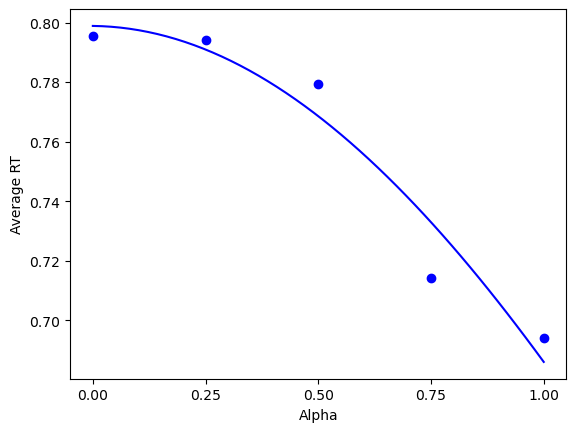

In [56]:
plt.figure()
plt.scatter(x, y, color='blue', label='Avg RT')
#plt.xticks(x, rt_df.index)
plt.xticks(x)
plt.xlabel('Alpha')
plt.ylabel('Average RT')
plt.plot(x_fit, y_fit, color='blue')
plt.show()

In [ ]:
MIN_DIST = 0.25

x = np.linspace(0, 3, 300)

def f(x, min_dist):
    y = []
    for i in range(len(x)):
        if(x[i] <= min_dist):
            y.append(1)
        else:
            y.append(np.exp(- x[i] + min_dist))
    return y

dist_low_dim = lambda x, a, b: 1 / (1 + a*x**(2*b))

p , _ = optimize.curve_fit(dist_low_dim, x, f(x, MIN_DIST))

a = p[0]
b = p[1] 
print("Hyperparameters a = " + str(a) + " and b = " + str(b))

In [ ]:
metrics = ['rt', 'ct', 'knn']
for metric in metrics:
    metric_df = df[metric]